In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import random
import matplotlib.pyplot as plt
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

def bgr_to_rgb(image): #open cv user bgr while matplot expects rgb
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def grayscale_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
def display_random_images(images, n=2):
    random_indices = random.sample(range(len(images)), n)
    fig, axes = plt.subplots(1, n, figsize=(10, 5))

    for i, idx in enumerate(random_indices):
        rgb_image = bgr_to_rgb(images[idx])
        axes[i].imshow(rgb_image)
        axes[i].axis('off')

    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


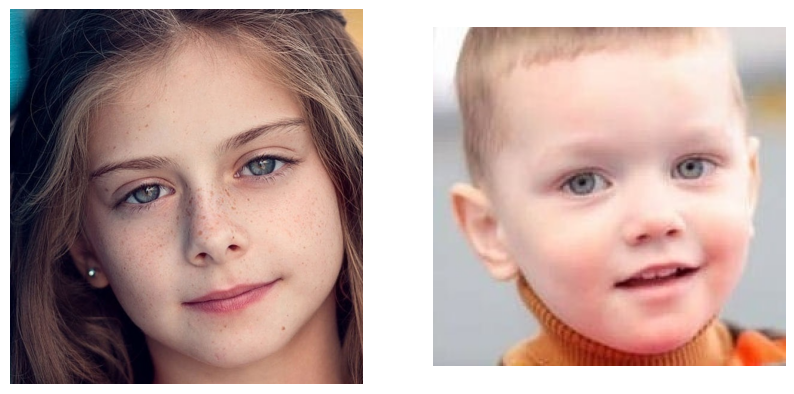

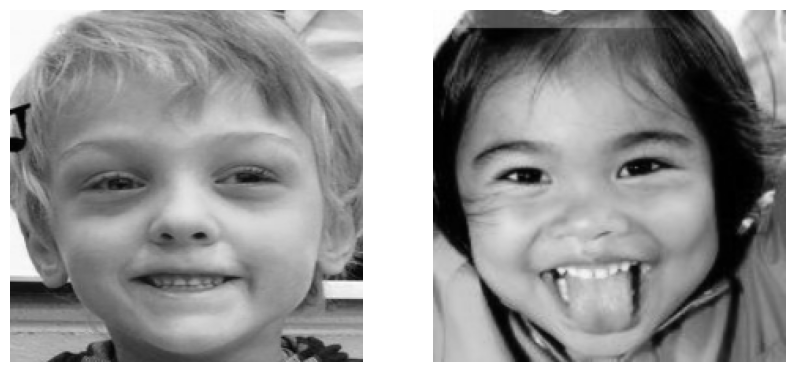

In [ ]:
def preprocess_images(images):
    # Convert to grayscale and resize
    gray_images = [cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (224, 224)) for img in images]
    return [grayscale_to_rgb(img) for img in gray_images]

folder_path_class1 = r'/content/drive/MyDrive/AutismDataset/consolidated/Non_Autistic'
folder_path_class2 = r'/content/drive/MyDrive/AutismDataset/consolidated/Autistic'

# Load images from each class folder
images_class1 = load_images_from_folder(folder_path_class1)
images_class2 = load_images_from_folder(folder_path_class2)

# Visualize random 2 images from class 1
display_random_images(images_class1)

# Preprocess images and assign labels
preprocessed_images_class1 = preprocess_images(images_class1)
preprocessed_images_class2 = preprocess_images(images_class2)

X = np.array(preprocessed_images_class1 + preprocessed_images_class2)
y = np.array([0] * len(preprocessed_images_class1) + [1] * len(preprocessed_images_class2))

# Visualize random 2 images from class 1
display_random_images(preprocessed_images_class2)

# Split the data into train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Load the pre-trained MobileNetV3 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers on top of VVG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

#Display trainable layers
for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.trainable)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step
0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
3

In [ ]:
# Train the model, only taining for 10 epochs
model.fit(X_train, y_train,batch_size=32, epochs=10)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Epoch 1/10
65/65 [==============================] - 16s 101ms/step - loss: 0.5464 - accuracy: 0.7172
Epoch 2/10
65/65 [==============================] - 6s 89ms/step - loss: 0.4431 - accuracy: 0.7852
Epoch 3/10
65/65 [==============================] - 6s 86ms/step - loss: 0.3856 - accuracy: 0.8236
Epoch 4/10
65/65 [==============================] - 6s 87ms/step - loss: 0.3476 - accuracy: 0.8489
Epoch 5/10
65/65 [==============================] - 6s 87ms/step - loss: 0.3219 - accuracy: 0.8664
Epoch 6/10
65/65 [==============================] - 6s 87ms/step - loss: 0.3247 - accuracy: 0.8635
Epoch 7/10
65/65 [==============================] - 6s 89ms/step - loss: 0.2827 - accuracy: 0.8839
Epoch 8/10
65/65 [==============================] - 6s 88ms/step - loss: 0.2532 - accuracy: 0.9038
Epoch 9/10
65/65 [==============================] - 6s 90ms/step - loss: 0.2422 - accuracy: 0.9135
Epoch 10/10
28/28 [==============================] - 5s 139ms/step - loss: 0.4601 - accuracy: 0.7902
Test l

28/28 [==============================] - 3s 86ms/step


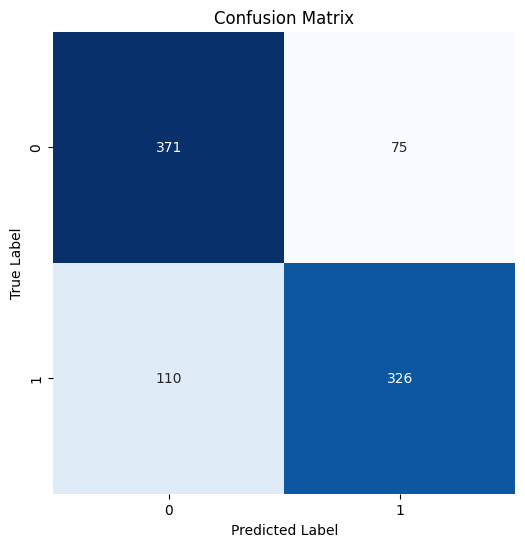

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the test data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       446
           1       0.81      0.75      0.78       436

    accuracy                           0.79       882
   macro avg       0.79      0.79      0.79       882
weighted avg       0.79      0.79      0.79       882

Sensitivity: 0.75
F1 Score: 0.78


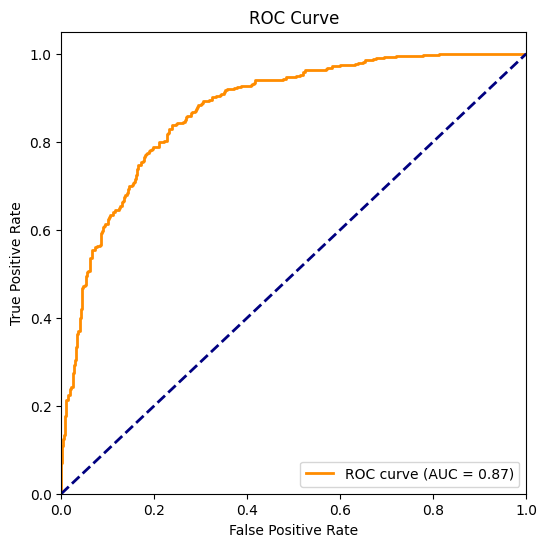

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, recall_score, f1_score
# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred)
print(f'Sensitivity: {sensitivity:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
# Calculate the false positive rate (FPR), true positive rate (TPR), and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the model to a file
model.save('ResNet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 44ms/step


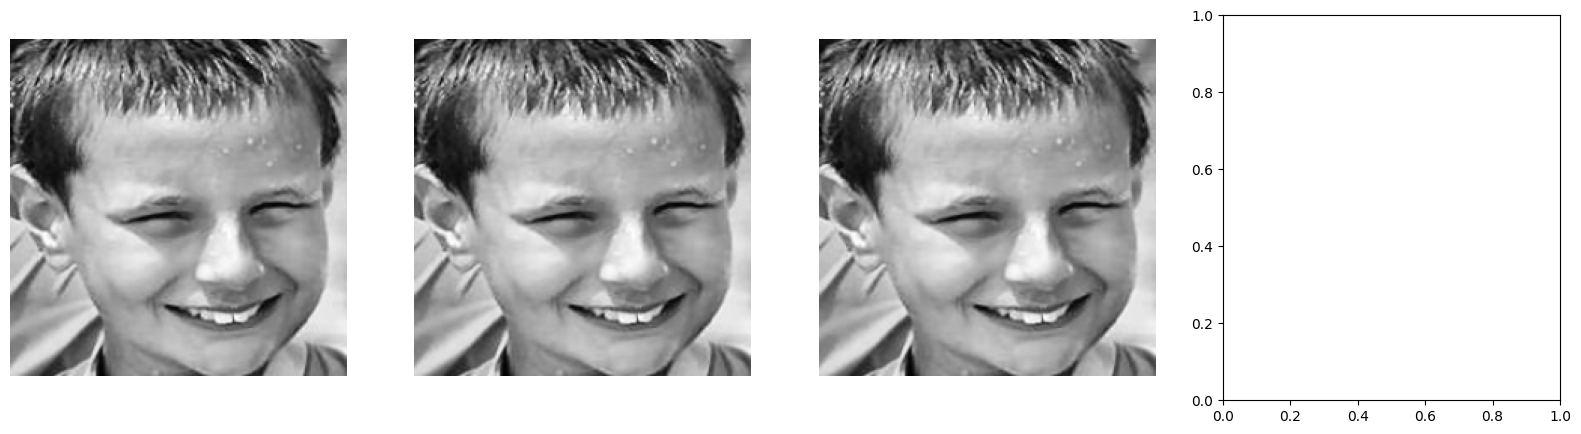

In [ ]:
#Bonus visualising featue maps
from tensorflow.keras.models import Model
# Get the first layer of the model
first_layer = model.layers[0]

# Create a new model with the same input as the original model and the output of the first layer
feature_map_model = Model(inputs=model.inputs, outputs=first_layer.output)

# Select a random preprocessed image
random_image = random.choice(X_test)

# Add a batch dimension to the image
random_image_batch = np.expand_dims(random_image, axis=0)

# Get the feature maps for the random image
feature_maps = feature_map_model.predict(random_image_batch)

# Visualize the feature maps
n_feature_maps = feature_maps.shape[-1]
n_columns = 4
n_rows = n_feature_maps // n_columns + int(n_feature_maps % n_columns != 0)

fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i in range(n_feature_maps):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].axis('off')

plt.show()